In [1]:
# Import third party libraries

# Numerical library
import numpy as np

# Used for matrix inversion
from numpy.linalg import inv

# Plotting library
import matplotlib.pyplot as plt

# Allows for printing inline for jupyter notebook
%matplotlib inline 

In [22]:
# Load datasets and store in ndarray
training_data = open('C:\Users\whitlock\Downloads\housing_train.txt','r')
X_train = np.loadtxt(training_data)

testing_data = open('C:\Users\whitlock\Downloads\housing_test.txt', 'r')
X_test = np.loadtxt(testing_data)

In [23]:
# Split off known target values
y_train = X_train[:,13]
y_test = X_test[:,13]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

In [24]:
# Remove column 13 from X
X_train = np.delete(X_train, 13, axis=1)
X_test = np.delete(X_test, 13, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, X_train), axis=1)
X_test = np.concatenate((dummy_test, X_test), axis=1)

## WE SHOULD TALK ABOUT THIS AS A GROUP
# Transpose X for further calculations
#X_train = X_train.T
#X_test = X_test.T

print X_train.shape

(433L, 14L)


In [26]:
## PART 2
# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
def calc_w_vector(X, y):
    return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

def alt_calc(X,y):
    return np.dot(np.dot(inv(X), inv(X.T), np.dot(X.T,y)))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)

# Caculate w vectors
w_train = calc_w_vector(X_train,y_train)
w_test = calc_w_vector(X_test,y_test)

# Print both weight vectors to console
print 'w_train vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train)))

print ' \r\nw_test vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test)))

w_train vector:
0: [ 39.584]
1: [-0.101]
2: [ 0.046]
3: [-0.003]
4: [ 3.072]
5: [-17.225]
6: [ 3.711]
7: [ 0.007]
8: [-1.599]
9: [ 0.374]
10: [-0.016]
11: [-1.024]
12: [ 0.01]
13: [-0.586]
 
w_test vector:
0: [ 16.494]
1: [-0.03]
2: [ 0.01]
3: [-0.16]
4: [ 1.129]
5: [-6.583]
6: [ 4.438]
7: [-0.077]
8: [-0.845]
9: [-0.025]
10: [ 0.005]
11: [-0.7]
12: [ 0.01]
13: [-0.037]


In [27]:
## PART 3
# Functions
def calc_sse(X, y, w):
    return np.dot(np.subtract(y, np.dot(X, w)).T, np.subtract(y,np.dot(X, w)))

# Apply learned weight vectors
target_func_train = np.dot(X_train, w_train)
target_func_test = np.dot(X_test, w_test)

# Print error output, not sure about the 0 values

print 'Training Model: \r\nSSE: %.2f \r\n' % calc_sse(X_train, y_train, w_train)

print 'Testing Model: \r\nSSE: %.2f' % calc_sse(X_test, y_test, w_test)

Training Model: 
SSE: 9561.19 

Testing Model: 
SSE: 852.51


In [29]:
## PART 4
# Repeating part 2 and 3 without a dummy features of 1's in X

# Remove dummy column from both tables
X_train_no_dummy = X_train[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]
X_test_no_dummy = X_test[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]

# Caculate w vectors
w_train_no_dummy = calc_w_vector(X_train_no_dummy,y_train)
w_test_no_dummy = calc_w_vector(X_test_no_dummy,y_test)

# Print both weight vectors to console
print 'w_train_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train_no_dummy)))

print ' \r\nw_test_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test_no_dummy)))

w_train_no_dummy vector:
0: [-0.098]
1: [ 0.049]
2: [-0.025]
3: [ 3.451]
4: [-0.355]
5: [ 5.817]
6: [-0.003]
7: [-1.021]
8: [ 0.227]
9: [-0.012]
10: [-0.388]
11: [ 0.017]
12: [-0.485]
 
w_test_no_dummy vector:
0: [ 0.011]
1: [ 0.01]
2: [-0.19]
3: [ 1.126]
4: [-1.137]
5: [ 5.801]
6: [-0.081]
7: [-0.649]
8: [-0.129]
9: [ 0.008]
10: [-0.572]
11: [ 0.011]
12: [ 0.072]


<h3>Thoughts about results</h3>
The above results make it seems like our model will be centered around the orgin beacuse we did not calcuate a true b value in the w vector.

In [30]:
## PART 4 cont.
# Apply learned weight vectors
target_func_train_no_dummy = np.dot(X_train_no_dummy, w_train_no_dummy)
target_func_test_no_dummy = np.dot(X_test_no_dummy, w_test_no_dummy)

# Print error output, not sure about the 0 values
print 'Training Model without Dummy: \r\nSSE: %.2f \r\n' % calc_sse(X_train_no_dummy, y_train, w_train_no_dummy)

print 'Testing Model without dummy: \r\nSSE: %.2f' % calc_sse(X_test_no_dummy, y_test, w_test_no_dummy)

Training Model without Dummy: 
SSE: 10598.06 

Testing Model without dummy: 
SSE: 883.85


In [31]:
def generate_uniform_feat(low,high,length):
    return np.random.uniform(low,high,length)[np.newaxis].T

# Set up values and experiment names
a_vals = [10,100,200,400,600,800,1000,1200,1400,1600]
experiments = np.arange(10)
inst = ["train", "test"]


new_features = {}

# Loop through and create feature for train and test
ctr = 0
for exp in experiments:
    for item in inst:
        if item == 'train':
            new_features["f_{0}_{1}".format(item,exp)] = generate_uniform_feat(0, a_vals[ctr], 433)
        else:
            new_features["f_{0}_{1}".format(item,exp)] = generate_uniform_feat(0, a_vals[ctr], 74)
    ctr += 1

#for key, value in new_features.iteritems() :
#    print key, value


f_test_8 [[  497.649]
 [   78.265]
 [  804.347]
 [   89.7  ]
 [ 1233.699]
 [ 1024.809]
 [  228.095]
 [  728.038]
 [  405.431]
 [  172.13 ]
 [  636.437]
 [  768.273]
 [   99.491]
 [  700.811]
 [  176.708]
 [   77.212]
 [ 1036.356]
 [ 1315.271]
 [  233.067]
 [  471.628]
 [  301.852]
 [  654.895]
 [  414.092]
 [ 1064.346]
 [ 1318.798]
 [ 1398.703]
 [ 1376.309]
 [  925.275]
 [ 1263.194]
 [ 1003.764]
 [   94.006]
 [   56.505]
 [  535.496]
 [  130.43 ]
 [  448.97 ]
 [  399.894]
 [  611.458]
 [ 1152.705]
 [ 1105.673]
 [  336.959]
 [ 1087.009]
 [   81.488]
 [ 1017.128]
 [  139.853]
 [ 1235.342]
 [ 1387.652]
 [ 1396.112]
 [ 1385.335]
 [ 1377.087]
 [  861.609]
 [  204.682]
 [  427.706]
 [  861.933]
 [  717.876]
 [  502.35 ]
 [  511.802]
 [  774.383]
 [  805.341]
 [  286.768]
 [  129.018]
 [ 1234.482]
 [  882.745]
 [  724.53 ]
 [  829.089]
 [  825.848]
 [ 1190.805]
 [  547.395]
 [ 1158.667]
 [  455.703]
 [  454.209]
 [  146.645]
 [ 1057.998]
 [  768.955]
 [ 1048.827]]
f_test_9 [[  288.409]
 [ 158

In [34]:
# Set up cases for 2,4,6,8,10 additional uniformly distributed features
def concatenate_features(tuple_obj, is_col):
    return np.concatenate((tuple_obj), axis=is_col)

def build_tuple(exp, item, ctr): 
    template = 'f_'
    return tuple(args)

def slicedict(d, s):
    return {k:v for k,v in d.iteritems() if k.endswith(s)}

new_datasets = [2,4,6,8,10]


# Need to add factor for dynamic addition of features
ctr = 2
#for exp in experiments:
#    for item in inst:
#        if item == 'train':
#            new_features["f_{0}_{1}_bulit".format(item,exp)] = np.concatenate(build_tuple(exp,item,ctr), axis=1)
#        else:
#            new_features["f_{0}_{1}".format(item,exp)] = np.concatenate(build_tuple(ctr), axis=1)
#        ctr += 2

# New test matricies
two_feat_train = np.concatenate((X_train,new_features['f_train_0'],new_features['f_train_1']), axis=1)
two_feat_test = np.concatenate((X_test,new_features['f_test_0'],new_features['f_test_1']), axis=1)

four_feat_train = np.concatenate((X_train,new_features['f_train_0'],new_features['f_train_1'],new_features['f_train_2'],new_features['f_train_3']), axis=1)
four_feat_test = np.concatenate((X_test,new_features['f_test_0'],new_features['f_test_1'], new_features['f_test_2'],new_features['f_test_3']), axis=1)

six_feat_train = np.concatenate((X_train,new_features['f_train_0'],new_features['f_train_1'],new_features['f_train_2'],new_features['f_train_3'], new_features['f_train_4'],new_features['f_train_5']), axis=1)
six_feat_test = np.concatenate((X_test,new_features['f_test_0'],new_features['f_test_1'], new_features['f_test_2'],new_features['f_test_3'], new_features['f_test_4'],new_features['f_test_5']), axis=1)

eight_feat_train = np.concatenate((X_train,new_features['f_train_0'],new_features['f_train_1'],new_features['f_train_2'],new_features['f_train_3'], new_features['f_train_4'],new_features['f_train_5'], new_features['f_train_6'],new_features['f_train_7']), axis=1)
eight_feat_test = np.concatenate((X_test,new_features['f_test_0'],new_features['f_test_1'], new_features['f_test_2'],new_features['f_test_3'], new_features['f_test_4'],new_features['f_test_5'], new_features['f_test_6'],new_features['f_test_7']), axis=1)

ten_feat_train = np.concatenate((X_train,new_features['f_train_0'],new_features['f_train_1'],new_features['f_train_2'],new_features['f_train_3'], new_features['f_train_4'],new_features['f_train_5'], new_features['f_train_6'],new_features['f_train_7'],new_features['f_train_8'],new_features['f_train_9']), axis=1)
ten_feat_test = np.concatenate((X_test,new_features['f_test_0'],new_features['f_test_1'], new_features['f_test_2'],new_features['f_test_3'], new_features['f_test_4'],new_features['f_test_5'], new_features['f_test_6'],new_features['f_test_7'],new_features['f_test_8'],new_features['f_test_9']), axis=1)


In [35]:
# Create weight vector for each test case
w_two_train = calc_w_vector(two_feat_train, y_train)
w_two_test = calc_w_vector(two_feat_test, y_test)

w_four_train = calc_w_vector(four_feat_train, y_train)
w_four_test = calc_w_vector(four_feat_test, y_test)

w_six_train = calc_w_vector(six_feat_train, y_train)
w_six_test = calc_w_vector(six_feat_test, y_test)

w_eight_train = calc_w_vector(eight_feat_train, y_train)
w_eight_test = calc_w_vector(eight_feat_test, y_test)

w_ten_train = calc_w_vector(ten_feat_train, y_train)
w_ten_test = calc_w_vector(ten_feat_test, y_test)

In [36]:
temp = ['two','four','six','eight','ten']
sse_vals = []

for i in temp:
    sse_vals.append(calc_sse(arg))

NameError: name 'arg' is not defined

In [37]:
sse_train = []
sse_test = []

sse_train.append(calc_sse(two_feat_train, y_train,w_two_train))
sse_test.append(calc_sse(two_feat_test, y_test,w_two_test))

sse_train.append(calc_sse(four_feat_train, y_train,w_four_train))
sse_test.append(calc_sse(four_feat_test, y_test,w_four_test))

sse_train.append(calc_sse(six_feat_train, y_train,w_six_train))
sse_test.append(calc_sse(six_feat_test, y_test,w_six_test))

sse_train.append(calc_sse(eight_feat_train, y_train,w_eight_train))
sse_test.append(calc_sse(eight_feat_test, y_test,w_eight_test))

sse_train.append(calc_sse(ten_feat_train, y_train,w_ten_train))
sse_test.append(calc_sse(ten_feat_test, y_test,w_ten_test))

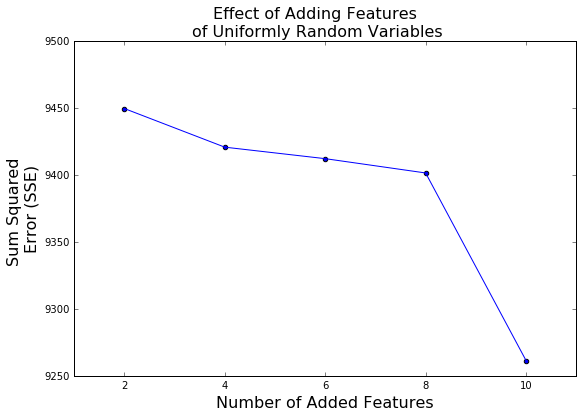

In [76]:
fig = plt.figure(figsize=(9,6))
plt.scatter(new_datasets,sse_train)
plt.plot(np.resize(new_datasets,(len(new_datasets),1)),np.resize(sse_train,(len(sse_train),1)))
fig.suptitle('Effect of Adding Features \nof Uniformly Random Variables', fontsize=16)
#plt.title(figure_title, y=1.08)
plt.xlabel('Number of Added Features', fontsize=16)
plt.ylabel('Sum Squared \nError (SSE)', fontsize=16)

In [77]:
# Calculate SSE for each feature experiment
print 'Two_train features added: \r\nSSE: %.2f \r\n' % calc_sse(two_feat_train, y_train,w_two_train)
print 'Four_train features added: \r\nSSE: %.2f \r\n' % calc_sse(four_feat_train, y_train,w_four_train)
print 'Six_train features added: \r\nSSE: %.2f \r\n' % calc_sse(six_feat_train, y_train,w_six_train)
print 'Eight_train features added: \r\nSSE: %.2f \r\n' % calc_sse(eight_feat_train, y_train,w_eight_train)
print 'Ten_train features added: \r\nSSE: %.2f \r\n' % calc_sse(ten_feat_train, y_train,w_ten_train)

print 'Two_test features added: \r\nSSE: %.2f \r\n' % calc_sse(two_feat_test, y_test,w_two_test)
print 'Four_test features added: \r\nSSE: %.2f \r\n' % calc_sse(four_feat_test, y_test,w_four_test)
print 'Six_test features added: \r\nSSE: %.2f \r\n' % calc_sse(six_feat_test, y_test,w_six_test)
print 'Eight_test features added: \r\nSSE: %.2f \r\n' % calc_sse(eight_feat_test, y_test,w_eight_test)
print 'Ten_test features added: \r\nSSE: %.2f \r\n' % calc_sse(ten_feat_test, y_test,w_ten_test)

Two_train features added: 
SSE: 9449.58 

Four_train features added: 
SSE: 9420.73 

Six_train features added: 
SSE: 9412.14 

Eight_train features added: 
SSE: 9401.46 

Ten_train features added: 
SSE: 9261.35 

Two_test features added: 
SSE: 846.37 

Four_test features added: 
SSE: 836.00 

Six_test features added: 
SSE: 782.54 

Eight_test features added: 
SSE: 762.84 

Ten_test features added: 
SSE: 718.56 



In [ ]:
## Extra stuff below ##

In [ ]:
print X_train.shape
print w_train.shape

In [ ]:
print X_train.T

In [ ]:
# Don't show scientific notation
np.set_printoptions(suppress=True)

print "Printing X_train:"
print X_train

In [ ]:
print "Printing y_train:"
print y_train

In [ ]:
# Plot feature 1: Crime rate by town
plt.scatter(X_train[:, 0],y_train)

In [ ]:
# Plot feature 2: Residential land zoned for lots over 25,0000 sq. ft
plt.scatter(X_train[:, 1],y_train)

In [ ]:
# Multiplotting feature 1 & 2
plt.scatter(X_train[:, 0],y_train)
plt.scatter(X_train[:, 1],y_train)

In [ ]:
# Plot feature 3: Proportion of non-retail business acres per town
plt.scatter(X_train[:, 2],y_train)

In [ ]:
# Plot feature 4: Charles River dummy variable (= 1 if tract bounds river, 0 otherwise)
plt.scatter(X_train[:, 3],y_train)

In [ ]:
# Plot feature 5: Nitric oxides concentration (parts per 10 million)
plt.scatter(X_train[:, 4],y_train)

In [ ]:
# Plot feature 6: Average number fo rooms per dwelling
plt.scatter(X_train[:, 5],y_train)

In [ ]:
# Plot feature 7: Porportion of owner-occupied units built prior to 1940
plt.scatter(X_train[:, 6],y_train)

In [ ]:
# Plot feature 8: Weighted distances to five Boston employment centers
plt.scatter(X_train[:, 7],y_train)

In [ ]:
# Plot feature 9: Index of accessability to radial highways
plt.scatter(X_train[:, 8],y_train)

In [ ]:
# Plot feature 10: Full-value property-tax rate per $10,000
plt.scatter(X_train[:, 9],y_train)

In [ ]:
# Plot feature 11: Pupil-teacher ratio by town
plt.scatter(X_train[:, 10],y_train)

In [ ]:
# Plot feature 12: 1000(Bk - 0.63)^2 where Bk is the population fo blacks by town
plt.scatter(X_train[:, 11],y_train)

In [ ]:
# Plot feature 13: % lower status of the population
plt.scatter(X_train[:, 12],y_train)